This is an Iterative Method of Learning when there is a large amounts of datasets available.if a model gets to learn > 80 or < 80 with the first set of data then based upon that we choose the iterative method to train or to test the data.

If the model learns > 80 then we must use the test method.
If the model learns < 80 then we must use the train method.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
raw = files.upload()

Saving bank dataset 1.xlsx to bank dataset 1.xlsx


In [ ]:
df = pd.read_excel('bank dataset 1.xlsx')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9034,52,housemaid,married,primary,no,1340,no,no,unknown,5,jun,175,1,-1,0,unknown,no
9035,57,technician,married,primary,no,67,no,no,unknown,5,jun,67,1,-1,0,unknown,no
9036,23,services,married,secondary,no,2673,yes,no,unknown,5,jun,81,2,-1,0,unknown,no
9037,44,services,married,secondary,no,382,no,no,unknown,5,jun,1167,1,-1,0,unknown,no


In [ ]:
df_copy = df.copy()
df_copy

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9034,52,housemaid,married,primary,no,1340,no,no,unknown,5,jun,175,1,-1,0,unknown,no
9035,57,technician,married,primary,no,67,no,no,unknown,5,jun,67,1,-1,0,unknown,no
9036,23,services,married,secondary,no,2673,yes,no,unknown,5,jun,81,2,-1,0,unknown,no
9037,44,services,married,secondary,no,382,no,no,unknown,5,jun,1167,1,-1,0,unknown,no


In [ ]:
df.shape

(9039, 17)

In [ ]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [ ]:
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
9029,44,technician,married,secondary,no,296,yes,yes,unknown,5,jun,169,1,-1,0,unknown,no
9030,37,blue-collar,married,secondary,no,151,yes,no,unknown,5,jun,202,1,-1,0,unknown,no
9031,42,blue-collar,divorced,secondary,no,1037,no,no,unknown,5,jun,271,1,-1,0,unknown,no
9032,37,services,married,secondary,no,2132,no,no,unknown,5,jun,232,1,-1,0,unknown,no
9033,37,self-employed,single,secondary,no,125,no,no,unknown,5,jun,56,1,-1,0,unknown,no
9034,52,housemaid,married,primary,no,1340,no,no,unknown,5,jun,175,1,-1,0,unknown,no
9035,57,technician,married,primary,no,67,no,no,unknown,5,jun,67,1,-1,0,unknown,no
9036,23,services,married,secondary,no,2673,yes,no,unknown,5,jun,81,2,-1,0,unknown,no
9037,44,services,married,secondary,no,382,no,no,unknown,5,jun,1167,1,-1,0,unknown,no
9038,40,blue-collar,married,secondary,no,6536,no,no,unknown,5,jun,647,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9039 entries, 0 to 9038
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9039 non-null   int64 
 1   job        9039 non-null   object
 2   marital    9039 non-null   object
 3   education  9039 non-null   object
 4   default    9039 non-null   object
 5   balance    9039 non-null   int64 
 6   housing    9039 non-null   object
 7   loan       9039 non-null   object
 8   contact    9039 non-null   object
 9   day        9039 non-null   int64 
 10  month      9039 non-null   object
 11  duration   9039 non-null   int64 
 12  campaign   9039 non-null   int64 
 13  pdays      9039 non-null   int64 
 14  previous   9039 non-null   int64 
 15  poutcome   9039 non-null   object
 16  y          9039 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,9039.000000,9039.000000,9039.000000,9039.000000,9039.000000,9039.0,9039.0
mean,39.245602,1037.630822,15.959066,263.617767,2.609581,-1.0,0.0
std,9.253832,2491.121967,9.037007,248.916075,2.951275,0.0,0.0
min,20.000000,-3372.000000,2.000000,0.000000,1.000000,-1.0,0.0
25%,32.000000,39.000000,8.000000,116.000000,1.000000,-1.0,0.0
50%,38.000000,332.000000,15.000000,192.000000,2.000000,-1.0,0.0
75%,46.000000,1059.000000,26.000000,322.000000,3.000000,-1.0,0.0
max,61.000000,58544.000000,30.000000,3366.000000,63.000000,-1.0,0.0


<Axes: >

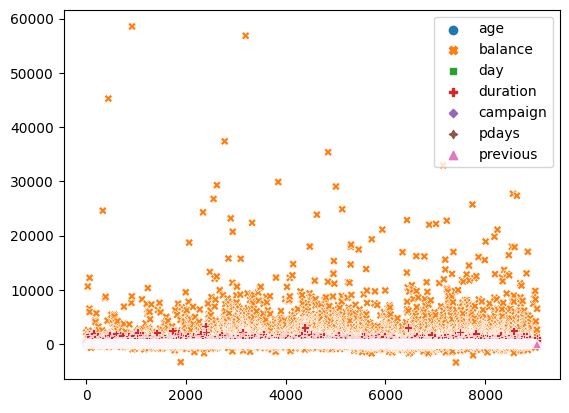

In [ ]:
sns.scatterplot(df)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['job']=le.fit_transform(df['job'])

In [ ]:
df['marital']=le.fit_transform(df['marital'])
df['education']=le.fit_transform(df['education'])
df['default']=le.fit_transform(df['default'])
df['housing']=le.fit_transform(df['housing'])
df['loan']=le.fit_transform(df['loan'])
df['contact']=le.fit_transform(df['contact'])
df['month']=le.fit_transform(df['month'])
df['poutcome']=le.fit_transform(df['poutcome'])
df['y']=le.fit_transform(df['y'])


In [ ]:
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
y            int64
dtype: object

In [ ]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
y.shape

(9039,)

In [ ]:
x.shape

(9039, 16)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.3,random_state=45)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [ ]:
x_train

array([[-0.25255526, -0.846533  , -0.27372166, ...,  0.        ,
         0.        ,  0.        ],
       [-0.79246509, -0.846533  , -0.27372166, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71928243, -0.846533  , -0.27372166, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.22439295,  1.54801904,  1.37564686, ...,  0.        ,
         0.        ,  0.        ],
       [-0.79246509,  2.14665705,  1.37564686, ...,  0.        ,
         0.        ,  0.        ],
       [-0.03659133, -0.54721399, -0.27372166, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
x_test

array([[-0.25255526,  1.54801904, -0.27372166, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.28735457,  1.54801904, -0.27372166, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.90708406, -1.145852  , -0.27372166, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.46851919, -0.846533  , -0.27372166, ...,  0.        ,
         0.        ,  0.        ],
       [-0.14457329, -0.846533  , -0.27372166, ...,  0.        ,
         0.        ,  0.        ],
       [-0.14457329, -0.846533  ,  1.37564686, ...,  0.        ,
         0.        ,  0.        ]])

**KNN Algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2612,   17],
       [  66,   17]])

In [ ]:
acs = accuracy_score(y_test,y_pred)*100
acs

96.93952802359883

In [ ]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2629
           1       0.50      0.20      0.29        83

    accuracy                           0.97      2712
   macro avg       0.74      0.60      0.64      2712
weighted avg       0.96      0.97      0.96      2712



In [ ]:
from google.colab import files
raw = files.upload()

Saving bank dataset 2.xlsx to bank dataset 2.xlsx


In [ ]:
df_1 = pd.read_excel('bank dataset 2.xlsx')
df_1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,44,technician,married,secondary,no,533,no,no,unknown,5,jun,74,1,-1,0,unknown,no
1,59,retired,divorced,primary,no,-88,yes,no,unknown,5,jun,910,2,-1,0,unknown,yes
2,45,management,married,secondary,no,0,no,no,unknown,5,jun,65,2,-1,0,unknown,no
3,38,admin.,single,unknown,no,13,no,no,unknown,5,jun,21,1,-1,0,unknown,no
4,48,retired,single,secondary,no,3458,no,no,unknown,5,jun,292,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9035,60,retired,married,primary,no,0,no,no,telephone,30,jul,130,3,-1,0,unknown,no
9036,37,blue-collar,married,primary,no,11,no,no,telephone,30,jul,109,8,-1,0,unknown,no
9037,51,admin.,married,secondary,yes,-160,no,yes,cellular,30,jul,118,4,-1,0,unknown,no
9038,59,management,married,tertiary,no,1308,no,no,cellular,30,jul,183,4,-1,0,unknown,no


In [ ]:
df_1.shape

(9040, 17)

In [ ]:
df_1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df_1['job']=le.fit_transform(df_1['job'])

In [ ]:
df_1['marital']=le.fit_transform(df_1['marital'])
df_1['education']=le.fit_transform(df_1['education'])
df_1['default']=le.fit_transform(df_1['default'])
df_1['housing']=le.fit_transform(df_1['housing'])
df_1['loan']=le.fit_transform(df_1['loan'])
df_1['contact']=le.fit_transform(df_1['contact'])
df_1['month']=le.fit_transform(df_1['month'])
df_1['poutcome']=le.fit_transform(df_1['poutcome'])
df_1['y']=le.fit_transform(df_1['y'])


In [ ]:
df_1.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
y            int64
dtype: object

In [ ]:
x_1 = df_1.iloc[:,:-1].values
y_1 = df_1.iloc[:,-1].values

In [ ]:
x_1.shape

(9040, 16)

In [ ]:
y_1.shape

(9040,)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test_new = ss.transform(x_1)

In [ ]:
x_train

array([[-0.25255526, -0.846533  , -0.27372166, ...,  0.        ,
         0.        ,  0.        ],
       [-0.79246509, -0.846533  , -0.27372166, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71928243, -0.846533  , -0.27372166, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.22439295,  1.54801904,  1.37564686, ...,  0.        ,
         0.        ,  0.        ],
       [-0.79246509,  2.14665705,  1.37564686, ...,  0.        ,
         0.        ,  0.        ],
       [-0.03659133, -0.54721399, -0.27372166, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
x_test_new

array([[ 4.40000000e+01,  9.00000000e+00,  1.00000000e+00, ...,
        -1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.90000000e+01,  5.00000000e+00,  1.73684013e-16, ...,
        -1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.50000000e+01,  4.00000000e+00,  1.00000000e+00, ...,
        -1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 5.10000000e+01, -3.32751054e-16,  1.00000000e+00, ...,
        -1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.90000000e+01,  4.00000000e+00,  1.00000000e+00, ...,
        -1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.00000000e+01,  3.00000000e+00,  1.00000000e+00, ...,
        -1.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

**KNN Algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_5 = knn.predict(x_1)
y_pred_5

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

In [ ]:
cm = confusion_matrix(y_1,y_pred_5)
cm

array([[7609,  923],
       [ 417,   91]])

In [ ]:
acs = accuracy_score(y_1,y_pred_5)*100
acs

85.17699115044249

In [ ]:
cr = classification_report(y_1,y_pred_5)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      8532
           1       0.09      0.18      0.12       508

    accuracy                           0.85      9040
   macro avg       0.52      0.54      0.52      9040
weighted avg       0.90      0.85      0.87      9040



In [ ]:
from google.colab import files
raw = files.upload()

Saving bank dataset 3.xlsx to bank dataset 3.xlsx


In [ ]:
df_2 = pd.read_excel('bank dataset 3.xlsx')
df_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,41,unknown,married,unknown,no,779,no,no,cellular,30,jul,647,10,-1,0,unknown,no
1,32,services,married,secondary,no,-31,no,yes,telephone,30,jul,96,6,-1,0,unknown,no
2,54,technician,married,secondary,no,114,no,no,cellular,30,jul,458,3,-1,0,unknown,yes
3,41,services,married,secondary,no,1785,no,no,cellular,30,jul,225,7,-1,0,unknown,no
4,26,blue-collar,single,secondary,no,179,no,no,cellular,30,jul,103,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9035,49,technician,married,secondary,no,8689,no,no,cellular,21,nov,586,1,-1,0,unknown,no
9036,43,entrepreneur,single,tertiary,no,5347,no,no,cellular,21,nov,189,3,-1,0,unknown,no
9037,51,housemaid,divorced,secondary,no,330,no,no,telephone,21,nov,218,3,-1,0,unknown,no
9038,52,management,married,tertiary,no,6873,yes,no,cellular,21,nov,235,2,-1,0,unknown,no


In [ ]:
df_2.shape

(9040, 17)

In [ ]:
df_2.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df_2['job']=le.fit_transform(df_2['job'])

In [ ]:
df_2['marital']=le.fit_transform(df_2['marital'])
df_2['education']=le.fit_transform(df_2['education'])
df_2['default']=le.fit_transform(df_2['default'])
df_2['housing']=le.fit_transform(df_2['housing'])
df_2['loan']=le.fit_transform(df_2['loan'])
df_2['contact']=le.fit_transform(df_2['contact'])
df_2['month']=le.fit_transform(df_2['month'])
df_2['poutcome']=le.fit_transform(df_2['poutcome'])
df_2['y']=le.fit_transform(df_2['y'])


In [ ]:
df_2.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
y            int64
dtype: object

In [ ]:
x_2 = df_2.iloc[:,:-1].values
y_2 = df_2.iloc[:,-1].values

In [ ]:
x_2.shape

(9040, 16)

In [ ]:
y_2.shape

(9040,)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test_new_1= ss.transform(x_2)

In [ ]:
x_train

array([[-0.25255526, -0.846533  , -0.27372166, ...,  0.        ,
         0.        ,  0.        ],
       [-0.79246509, -0.846533  , -0.27372166, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71928243, -0.846533  , -0.27372166, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.22439295,  1.54801904,  1.37564686, ...,  0.        ,
         0.        ,  0.        ],
       [-0.79246509,  2.14665705,  1.37564686, ...,  0.        ,
         0.        ,  0.        ],
       [-0.03659133, -0.54721399, -0.27372166, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
x_test_new_1

array([[ 4.10000000e+01,  1.10000000e+01,  1.00000000e+00, ...,
        -1.00000000e+00,  0.00000000e+00,  3.00000000e+00],
       [ 3.20000000e+01,  7.00000000e+00,  1.00000000e+00, ...,
        -1.00000000e+00,  0.00000000e+00,  3.00000000e+00],
       [ 5.40000000e+01,  9.00000000e+00,  1.00000000e+00, ...,
        -1.00000000e+00,  0.00000000e+00,  3.00000000e+00],
       ...,
       [ 5.10000000e+01,  3.00000000e+00, -3.45727345e-16, ...,
        -1.00000000e+00,  0.00000000e+00,  3.00000000e+00],
       [ 5.20000000e+01,  4.00000000e+00,  1.00000000e+00, ...,
        -1.00000000e+00,  0.00000000e+00,  3.00000000e+00],
       [ 4.30000000e+01,  4.00000000e+00,  1.00000000e+00, ...,
        -1.00000000e+00,  0.00000000e+00,  3.00000000e+00]])

**KNN Algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_6 = knn.predict(x_2)
y_pred_6

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

In [ ]:
cm = confusion_matrix(y_2,y_pred_6)
cm

array([[7821,  666],
       [ 491,   62]])

In [ ]:
acs = accuracy_score(y_2,y_pred_6)*100
acs

87.20132743362832

In [ ]:
cr = classification_report(y_2,y_pred_6)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      8487
           1       0.09      0.11      0.10       553

    accuracy                           0.87      9040
   macro avg       0.51      0.52      0.51      9040
weighted avg       0.89      0.87      0.88      9040



In [ ]:
from google.colab import files
raw = files.upload()

Saving bank dataset 4.xlsx to bank dataset 4.xlsx


In [ ]:
df_3 = pd.read_excel('bank dataset 4.xlsx')
df_3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,admin.,married,primary,no,72,yes,yes,cellular,21,nov,849,1,-1,0,unknown,yes
1,31,management,single,tertiary,no,528,no,yes,cellular,21,nov,5,7,-1,0,unknown,no
2,46,self-employed,married,primary,no,3155,yes,no,cellular,21,nov,271,1,-1,0,unknown,no
3,46,services,married,secondary,no,2948,no,no,cellular,21,nov,893,1,-1,0,unknown,yes
4,37,admin.,divorced,secondary,no,1533,yes,no,cellular,21,nov,555,4,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9035,33,admin.,married,secondary,no,177,yes,no,cellular,11,may,100,1,-1,0,unknown,no
9036,51,blue-collar,married,secondary,no,3370,yes,no,cellular,11,may,59,1,-1,0,unknown,no
9037,30,management,divorced,tertiary,yes,-1105,yes,no,cellular,11,may,686,1,-1,0,unknown,no
9038,55,services,married,secondary,no,761,yes,no,telephone,11,may,28,1,-1,0,unknown,no


In [ ]:
df_3.shape

(9040, 17)

In [ ]:
df_3.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df_3['job']=le.fit_transform(df_3['job'])

In [ ]:
df_3['marital']=le.fit_transform(df_3['marital'])
df_3['education']=le.fit_transform(df_3['education'])
df_3['default']=le.fit_transform(df_3['default'])
df_3['housing']=le.fit_transform(df_3['housing'])
df_3['loan']=le.fit_transform(df_3['loan'])
df_3['contact']=le.fit_transform(df_3['contact'])
df_3['month']=le.fit_transform(df_3['month'])
df_3['poutcome']=le.fit_transform(df_3['poutcome'])
df_3['y']=le.fit_transform(df_3['y'])


In [ ]:
df_3.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
y            int64
dtype: object

In [ ]:
x_3 = df_3.iloc[:,:-1].values
y_3 = df_3.iloc[:,-1].values

In [ ]:
x_3.shape

(9040, 16)

In [ ]:
y_3.shape

(9040,)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test_new_2 = ss.transform(x_3)

In [ ]:
x_train

array([[-0.25255526, -0.846533  , -0.27372166, ...,  0.        ,
         0.        ,  0.        ],
       [-0.79246509, -0.846533  , -0.27372166, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71928243, -0.846533  , -0.27372166, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.22439295,  1.54801904,  1.37564686, ...,  0.        ,
         0.        ,  0.        ],
       [-0.79246509,  2.14665705,  1.37564686, ...,  0.        ,
         0.        ,  0.        ],
       [-0.03659133, -0.54721399, -0.27372166, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
x_test_new_2

array([[ 4.00000000e+01,  1.11566271e-16,  1.00000000e+00, ...,
        -1.00000000e+00,  0.00000000e+00,  3.00000000e+00],
       [ 3.10000000e+01,  4.00000000e+00,  2.00000000e+00, ...,
        -1.00000000e+00,  0.00000000e+00,  3.00000000e+00],
       [ 4.60000000e+01,  6.00000000e+00,  1.00000000e+00, ...,
        -1.00000000e+00,  0.00000000e+00,  3.00000000e+00],
       ...,
       [ 3.00000000e+01,  4.00000000e+00,  4.71972004e-16, ...,
        -1.00000000e+00,  0.00000000e+00,  3.00000000e+00],
       [ 5.50000000e+01,  7.00000000e+00,  1.00000000e+00, ...,
        -1.00000000e+00,  0.00000000e+00,  3.00000000e+00],
       [ 3.30000000e+01,  3.00000000e+00,  1.00000000e+00, ...,
        -1.00000000e+00,  0.00000000e+00,  3.00000000e+00]])

**KNN Algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_7 = knn.predict(x_3)
y_pred_7

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

In [ ]:
cm = confusion_matrix(y_3,y_pred_7)
cm

array([[7326,  647],
       [ 956,  111]])

In [ ]:
acs = accuracy_score(y_3,y_pred_7)*100
acs

82.26769911504425

In [ ]:
cr = classification_report(y_3,y_pred_7)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7973
           1       0.15      0.10      0.12      1067

    accuracy                           0.82      9040
   macro avg       0.52      0.51      0.51      9040
weighted avg       0.80      0.82      0.81      9040



In [ ]:
from google.colab import files
raw = files.upload()

Saving bank dataset 5.xlsx to bank dataset 5.xlsx


In [ ]:
df_4 = pd.read_excel('bank dataset 5.xlsx')
df_4

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,43,services,single,secondary,no,518,yes,no,cellular,11,may,295,1,370,1,failure,no
1,40,blue-collar,single,primary,no,0,yes,yes,cellular,11,may,114,2,-1,0,unknown,no
2,24,services,married,secondary,no,4500,yes,no,cellular,11,may,733,2,-1,0,unknown,yes
3,47,blue-collar,married,secondary,no,71,yes,no,cellular,11,may,170,1,370,1,failure,no
4,30,self-employed,single,tertiary,no,137,yes,no,cellular,11,may,214,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9046,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
9047,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
9048,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
9049,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [ ]:
df_4.shape

(9051, 17)

In [ ]:
df_4.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df_4['job']=le.fit_transform(df_4['job'])

In [ ]:
df_4['marital']=le.fit_transform(df_4['marital'])
df_4['education']=le.fit_transform(df_4['education'])
df_4['default']=le.fit_transform(df_4['default'])
df_4['housing']=le.fit_transform(df_4['housing'])
df_4['loan']=le.fit_transform(df_4['loan'])
df_4['contact']=le.fit_transform(df_4['contact'])
df_4['month']=le.fit_transform(df_4['month'])
df_4['poutcome']=le.fit_transform(df_4['poutcome'])
df_4['y']=le.fit_transform(df_4['y'])


In [ ]:
df_4.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
y            int64
dtype: object

In [ ]:
x_4 = df_4.iloc[:,:-1].values
y_4 = df_4.iloc[:,-1].values

In [ ]:
x_4.shape

(9051, 16)

In [ ]:
y_4.shape

(9051,)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test_new_3= ss.transform(x_4)

In [ ]:
x_train

array([[-0.25255526, -0.846533  , -0.27372166, ...,  0.        ,
         0.        ,  0.        ],
       [-0.79246509, -0.846533  , -0.27372166, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71928243, -0.846533  , -0.27372166, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.22439295,  1.54801904,  1.37564686, ...,  0.        ,
         0.        ,  0.        ],
       [-0.79246509,  2.14665705,  1.37564686, ...,  0.        ,
         0.        ,  0.        ],
       [-0.03659133, -0.54721399, -0.27372166, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
x_test_new_3

array([[ 4.30000000e+01,  7.00000000e+00,  2.00000000e+00, ...,
         3.70000000e+02,  1.00000000e+00,  0.00000000e+00],
       [ 4.00000000e+01,  1.00000000e+00,  2.00000000e+00, ...,
        -1.00000000e+00,  0.00000000e+00,  3.00000000e+00],
       [ 2.40000000e+01,  7.00000000e+00,  1.00000000e+00, ...,
        -1.00000000e+00,  0.00000000e+00,  3.00000000e+00],
       ...,
       [ 7.10000000e+01,  5.00000000e+00, -2.32301051e-16, ...,
        -1.00000000e+00,  0.00000000e+00,  3.00000000e+00],
       [ 7.20000000e+01,  5.00000000e+00,  1.00000000e+00, ...,
         1.84000000e+02,  3.00000000e+00,  2.00000000e+00],
       [ 5.70000000e+01,  1.00000000e+00,  1.00000000e+00, ...,
        -1.00000000e+00,  0.00000000e+00,  3.00000000e+00]])

**KNN Algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_8 = knn.predict(x_4)
y_pred_8

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

In [ ]:
cm = confusion_matrix(y_4,y_pred_8)
cm

array([[5764,  429],
       [2651,  207]])

In [ ]:
acs = accuracy_score(y_4,y_pred_8)*100
acs

65.97061098221191

In [ ]:
cr = classification_report(y_4,y_pred_8)
print(cr)

              precision    recall  f1-score   support

           0       0.68      0.93      0.79      6193
           1       0.33      0.07      0.12      2858

    accuracy                           0.66      9051
   macro avg       0.51      0.50      0.45      9051
weighted avg       0.57      0.66      0.58      9051

